This notebook looks at the behavioral data collected as part of the LEMON Project. We'd like to know which of these questionaaire might be a better choice for a classification task. So our first question would be what can resting state EEG data reveal about which people's current mental state, and their emotional and cognitive abilities. 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
data_dir = 'data/LEMON_data/behavioral/Behavioural_Data_MPILMBB_LEMON/'

# helper functions
def plot_hist(data,):
    columns = data.columns
    if len(columns) == 1:
            plt.figure(figsize=(5, 5))
            plt.hist(data[columns[0]], bins=20)
            plt.title(str(columns[0]))
    elif len(columns)%2 == 0:
        fig, ax = plt.subplots(len(columns)//2, 2, figsize=(10, 5*len(columns)//2))
        for j, col in enumerate(columns):
            if len(columns)//2 == 1:
                ax[j%2].hist(data[col], bins=20)
                ax[j%2].set_title(col)
            else:
                ax[j//2, j%2].hist(data[col], bins=20)
                ax[j//2, j%2].set_title(col)
    elif len(columns) <= 5:
        fig, ax = plt.subplots(1, len(columns), figsize=(5*len(columns), 5), sharey=True)
        for j, col in enumerate(columns):
            ax[j].hist(data[col], bins=20)
            ax[j].set_title(col)
    elif len(columns) // 3 == 0:
        fig, ax = plt.subplots(len(columns)//3, 3, figsize=(5*3, 5*len(columns)//3))
        for j, col in enumerate(columns):
            ax[j//3, j%3].hist(data[col], bins=20)
            ax[j//3, j%3].set_title(col)
    else:
        fig, ax = plt.subplots(1, len(columns), figsize=(5*len(columns), 5), sharey=True)
        for j, col in enumerate(columns):
            ax[j].hist(data[col], bins=20)
            ax[j].set_title(col)

## Personality and Emotions

### MDBF

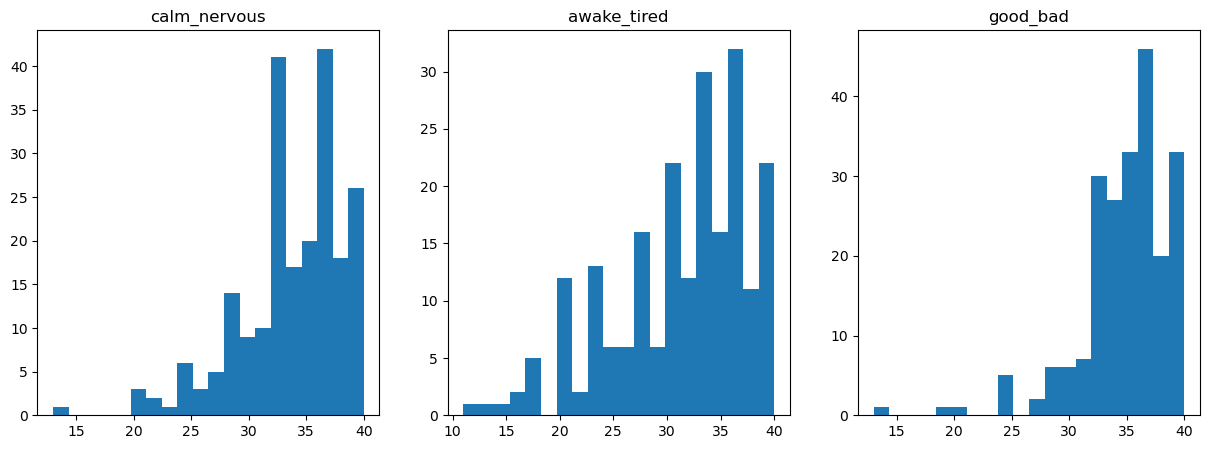

In [7]:
data_dir = data_dir + 'Emotion_and_Personality_Test_Battery_LEMON/'
data = pd.read_csv(data_dir+'MDBF_Day2.csv',
                   index_col=0)
data.rename(columns={'MDBF_Day2_RU_Scale': 'calm_nervous',
                     'MDBF_Day2_WM_Scale': 'awake_tired',
                     'MDBF_Day2_GS_Scale': 'good_bad'}, inplace=True)
data.describe()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(data['calm_nervous'], bins=20)
ax[0].set_title('calm_nervous')
ax[1].hist(data['awake_tired'], bins=20)
ax[1].set_title('awake_tired')
ax[2].hist(data['good_bad'], bins=20)
ax[2].set_title('good_bad')
plt.show()

### Emotional Regulation 

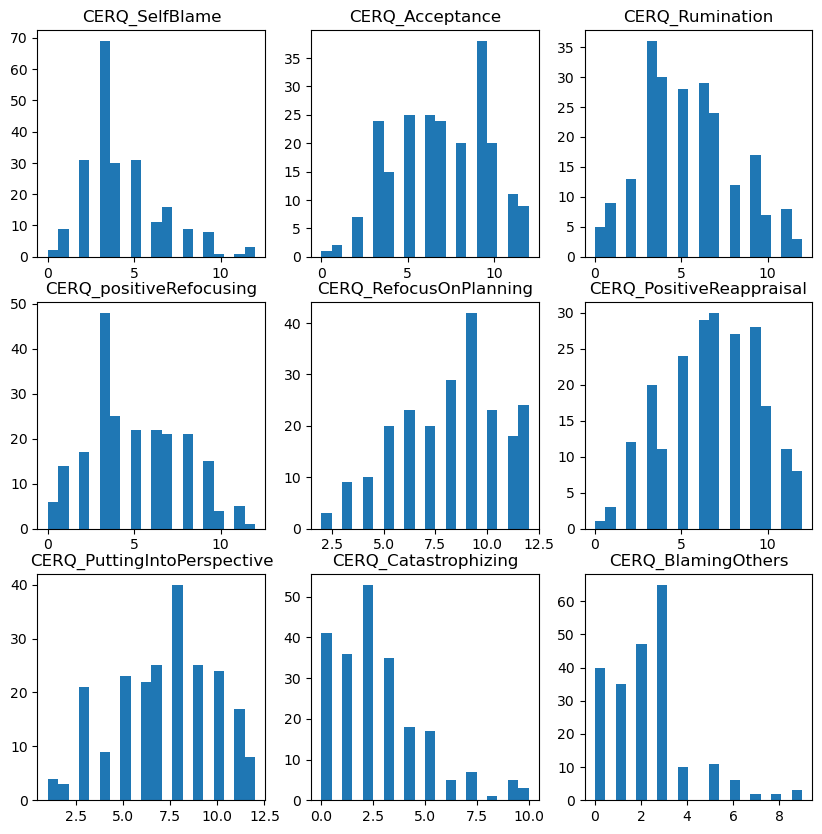

In [6]:
data = pd.read_csv(data_dir+'CERQ.csv',
                   index_col=0)
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i, col in enumerate(data.columns):
    ax[i//3, i%3].hist(data[col], bins=20)
    ax[i//3, i%3].set_title(col)


### Other Questionaires

In [2]:
data_dir = data_dir + 'Emotion_and_Personality_Test_Battery_LEMON/'

1 PSQ
﻿PSQ
Perceived Stress Questionnaire (Short version)

References
1. Levenstein, S., Prantera, C., Varvo, V., Scribano, M. L., Berto, E., Luzi, C., & Andreoli, A. (1993). Development of the Perceived Stress Questionnaire: a new tool for psychosomatic research. Journal of psychosomatic research, 37(1), 19-32.
2. Fliege, H., Rose, M., Arck, P., Levenstein, S. & Klapp, B.F. (2001). Validierung des "Perceived Stress Questionnaire" (PSQ) an einer deutschen Stichprobe. Diagnostica, 47 (3), 142-152.


Timeframe
Last 2 years

20 Items

Response scores:
from 1 (almost never) to 4 (usually).

1 = fast nie
2 = manchmal
3 = häufig
4 = meistens


Subscales/Columns:
PSQ_Worries: Worries	
PSQ_Tension: Tension	
PSQ_Joy: Joy	
PSQ_Demands: Demands 	
PSQ_OverallScore: OverallScore


4 MARS
﻿MARS
Measure of Affect Regulation Style

References:
1. Larsen, R. J. & Prizmic, Z. (2004). Affect regulation. In: Baumeister, R. F. & Vohs, K. D. (Eds) Handbook of self-regulation: Research, theory, and applicati

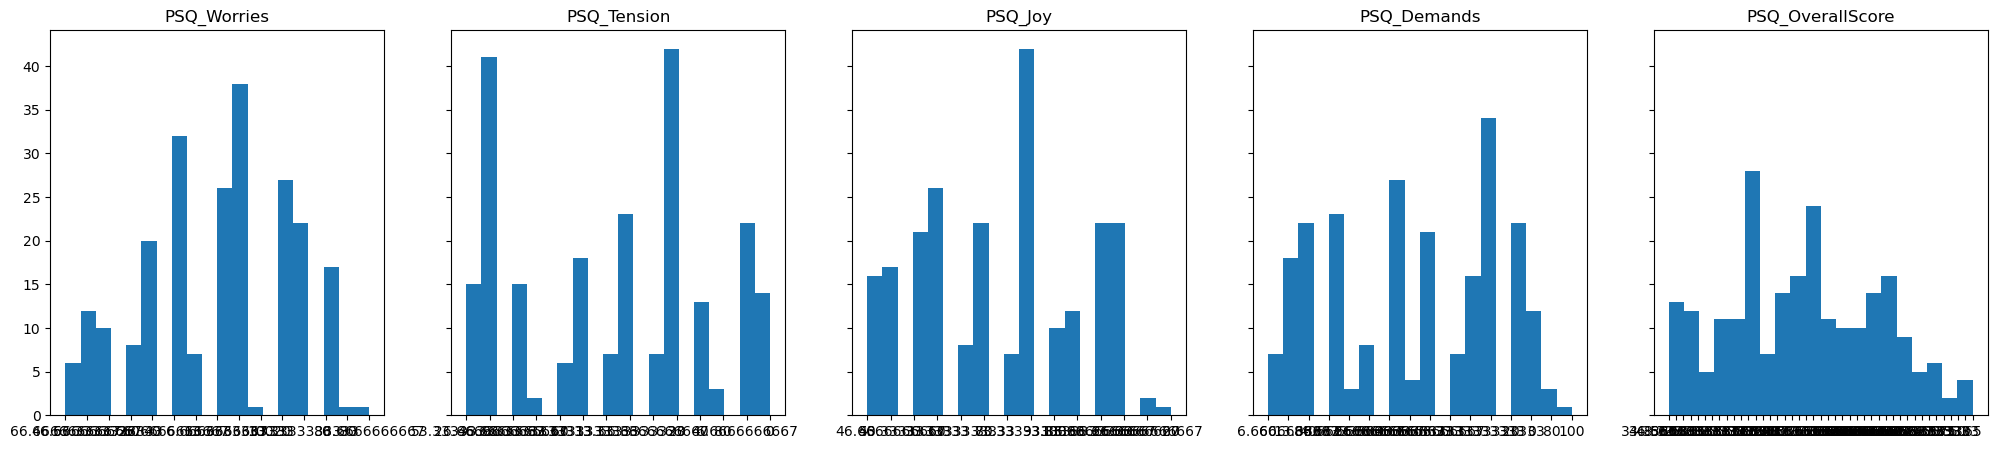

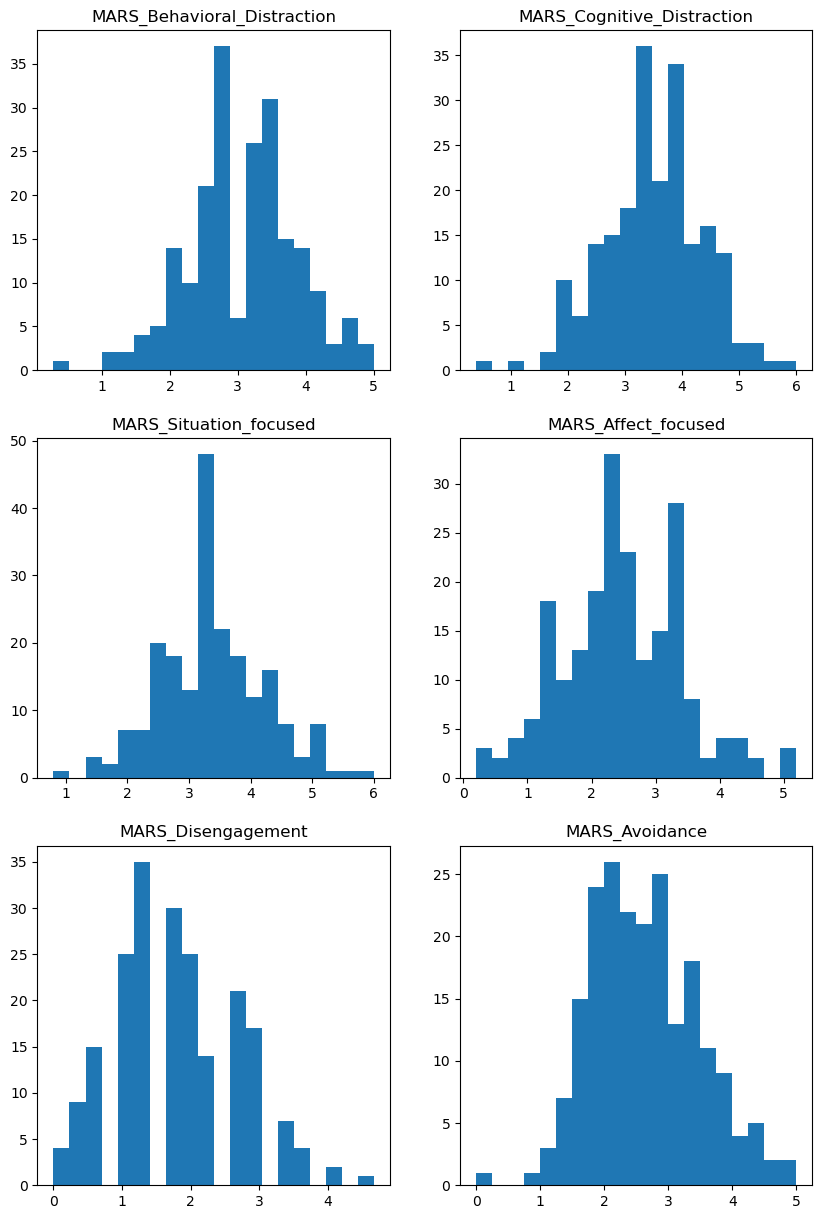

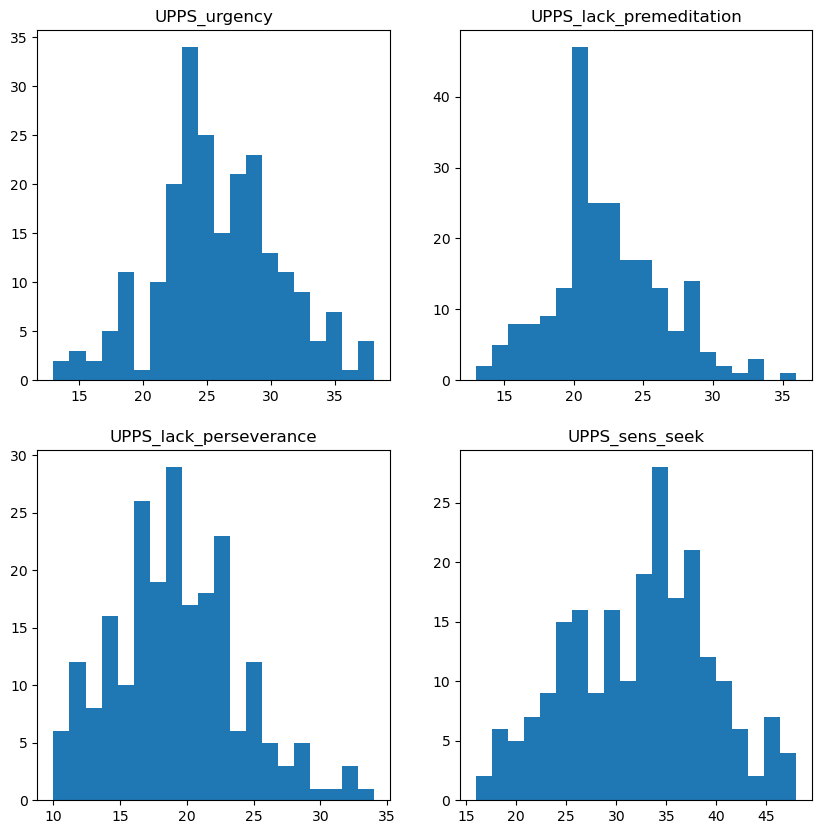

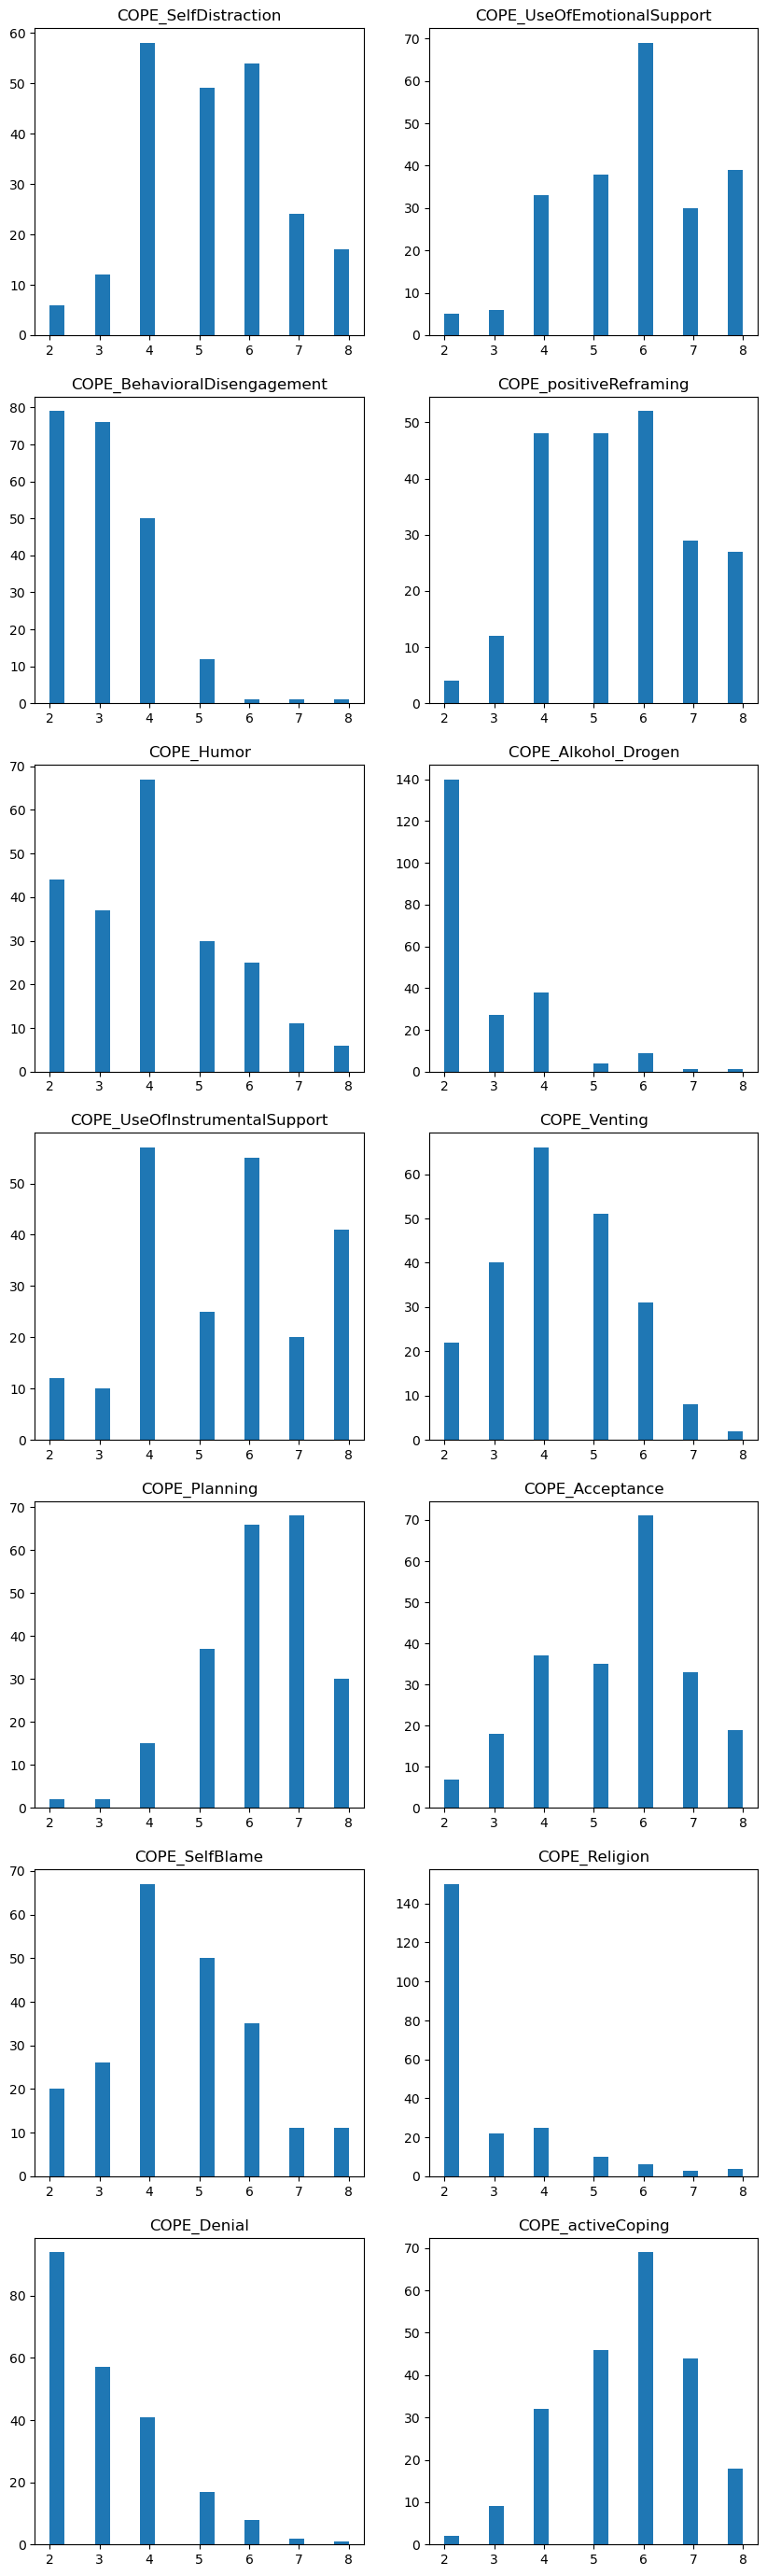

In [8]:
from pathlib import Path

for i, path in enumerate(list(Path(data_dir).rglob('*.csv'))[15:]):
    # check if it is plotted
    above_plotted = ['MDBF', 'CERQ', 'STAXI', 'NYC_Q', 'YFAS']
    for ap in above_plotted:
        if path.stem.__contains__(ap):
            continue

    # print questionnaire's info
    print(i+1, '\033[1m' + path.stem + '\033[0m')
    with open(path.parent / (path.stem + '_info.txt'), 'r') as f:
        print(f.read())
    
    # open the data and plot histogram
    data = pd.read_csv(path, index_col=0)
    plot_hist(data)

## Extract labels

In [20]:
questionnaires = ['TEIQue-SF', 'ERQ', 'CERQ', 'COPE', 'MARS', 'TAS', 'PSQ']
name = questionnaires[2]
data = pd.read_csv(data_dir+f'{name}.csv', index_col=0)
data.head()

,CERQ_SelfBlame,CERQ_Acceptance,CERQ_Rumination,CERQ_positiveRefocusing,CERQ_RefocusOnPlanning,CERQ_PositiveReappraisal,CERQ_PuttingIntoPerspective,CERQ_Catastrophizing,CERQ_BlamingOthers
sub-032311,7,5,6,3,4,6,5,4,4
sub-032309,5,8,5,4,3,2,2,9,5
sub-032382,6,8,4,4,11,5,6,4,3
sub-032302,6,5,4,7,10,8,8,1,3
sub-032315,5,10,5,3,4,10,6,2,0


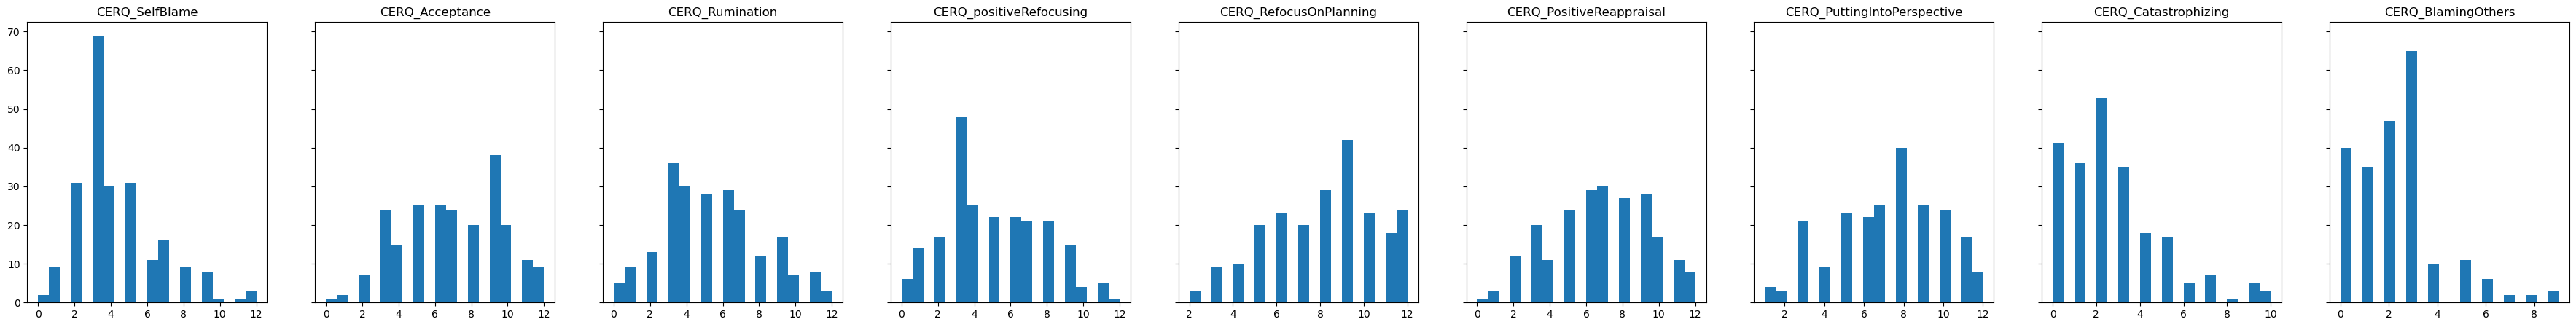

In [25]:
plot_hist(data)